# Análisis Exploratorio de Datos (EDA) - Accidentalidad en el Municipio de Envigado

# Importamos las librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Configuración para visualización

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Carga y exploración inicial de datos

In [9]:
df = pd.read_csv("Datasets/Accidentalidad_Municipio_de__Envigado_20250606.csv")

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\79020895.py:1: DtypeWarning: Columns (4,5,6,7,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datasets/Accidentalidad_Municipio_de__Envigado_20250606.csv")


In [10]:
df.head()

,RADICADO,FECHA,HORA,DÍA DE LA SEMANA,CLASE DE VEHICULO,TIPO DE SERVICIO,TIPO DE VICTIMA,SEXO,ESTADO DE BEODEZ,RESULTADO DE BEODEZ,GRAVEDAD,CLASE DE ACCIDENTE,CAUSA,DIRECCIÓN,BARRIO,AREA,Coordenadas
0,2134024,1/01/2014,10:30:00 p. m.,Miércoles,NaN,NaN,NaN,NaN,0,0,SOLO DAÑOS,CHOQUE,Otra-Conductor,NaN,LAS FLORES,URBANA,POINT (-75.57921612 6.172014741)
1,2134024,1/01/2014,10:30:00 p. m.,Miércoles,NaN,NaN,NaN,NaN,0,0,HERIDOS,CHOQUE,Otra-Conductor,NaN,LAS FLORES,URBANA,POINT (-75.57921612 6.172014741)
2,2134026,1/01/2014,11:30:00 p. m.,Miércoles,NaN,NaN,NaN,NaN,0,0,HERIDOS,CHOQUE,Desobedecer señales,NaN,LAS VEGAS,URBANA,POINT (-75.60353748 6.162050378)
3,2134026,1/01/2014,11:30:00 p. m.,Miércoles,NaN,NaN,NaN,NaN,0,0,HERIDOS,CHOQUE,Desobedecer señales,NaN,LAS VEGAS,URBANA,POINT (-75.60353748 6.162050378)
4,2134026,1/01/2014,11:30:00 p. m.,Miércoles,NaN,NaN,NaN,NaN,0,0,SOLO DAÑOS,CHOQUE,Desobedecer señales,NaN,LAS VEGAS,URBANA,POINT (-75.60353748 6.162050378)


# Información general del dataset

In [12]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89826 entries, 0 to 89825
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RADICADO             89826 non-null  int64 
 1   FECHA                89826 non-null  object
 2   HORA                 89826 non-null  object
 3   DÍA DE LA SEMANA     89826 non-null  object
 4   CLASE DE VEHICULO    390 non-null    object
 5   TIPO DE SERVICIO     390 non-null    object
 6   TIPO DE VICTIMA      81 non-null     object
 7   SEXO                 81 non-null     object
 8   ESTADO DE BEODEZ     89826 non-null  int64 
 9   RESULTADO DE BEODEZ  89826 non-null  int64 
 10  GRAVEDAD             89826 non-null  object
 11  CLASE DE ACCIDENTE   89826 non-null  object
 12  CAUSA                89826 non-null  object
 13  DIRECCIÓN            1459 non-null   object
 14  BARRIO               89826 non-null  object
 15  AREA                 89826 non-null  object
 16  Coor

# Verificamos la cantidad de valores únicos por columna

In [13]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Columna '{col}' tiene {unique_values} valores unicos.")

Columna 'RADICADO' tiene 43759 valores unicos.
Columna 'FECHA' tiene 5518 valores unicos.
Columna 'HORA' tiene 1306 valores unicos.
Columna 'DÍA DE LA SEMANA' tiene 7 valores unicos.
Columna 'CLASE DE VEHICULO' tiene 10 valores unicos.
Columna 'TIPO DE SERVICIO' tiene 3 valores unicos.
Columna 'TIPO DE VICTIMA' tiene 5 valores unicos.
Columna 'SEXO' tiene 2 valores unicos.
Columna 'ESTADO DE BEODEZ' tiene 2 valores unicos.
Columna 'RESULTADO DE BEODEZ' tiene 4 valores unicos.
Columna 'GRAVEDAD' tiene 3 valores unicos.
Columna 'CLASE DE ACCIDENTE' tiene 7 valores unicos.
Columna 'CAUSA' tiene 408 valores unicos.
Columna 'DIRECCIÓN' tiene 637 valores unicos.
Columna 'BARRIO' tiene 49 valores unicos.
Columna 'AREA' tiene 3 valores unicos.
Columna 'Coordenadas' tiene 1427 valores unicos.


# Verificamos la presencia de valores nulos

In [14]:
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Valores nulos por columna:
CLASE DE VEHICULO    89436
TIPO DE SERVICIO     89436
TIPO DE VICTIMA      89745
SEXO                 89745
DIRECCIÓN            88367
Coordenadas          67366
dtype: int64


# Verificamos duplicados

In [15]:
duplicados = df.duplicated().sum()
print(f"El dataset contiene {duplicados} filas duplicadas.")

El dataset contiene 38022 filas duplicadas.


# Convertimos la columna de fecha a formato datetime

In [17]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='mixed')

# Extraemos componentes adicionales de la fecha

In [18]:
df['MES'] = df['FECHA'].dt.month
df['AÑO'] = df['FECHA'].dt.year
df['DIA_MES'] = df['FECHA'].dt.day

# Limpiamos la columna de hora (convertir a formato de hora adecuado)

In [19]:
def limpiar_hora(hora_str):
    if pd.isna(hora_str):
        return np.nan
    hora_str = str(hora_str).strip().lower()
    try:
        if 'a. m.' in hora_str or 'p. m.' in hora_str:
            hora_str = hora_str.replace('a. m.', 'AM').replace('p. m.', 'PM')
            dt = datetime.strptime(hora_str, '%I:%M:%S %p')
            return dt.hour
        else:
            return np.nan
    except:
        return np.nan

df['HORA_DIA'] = df['HORA'].apply(limpiar_hora)

# Agrupamos las horas en franjas horarias

In [20]:
def franja_horaria(hora):
    if pd.isna(hora):
        return 'Sin dato'
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['FRANJA_HORARIA'] = df['HORA_DIA'].apply(franja_horaria)

# Limpiamos y transformamos las columnas con datos faltantes
# Rellenamos valores nulos en columnas categóricas con 'Sin dato'

In [21]:
columnas_categoricas = ['CLASE DE VEHICULO', 'TIPO DE SERVICIO', 'TIPO DE VICTIMA', 'SEXO']
for col in columnas_categoricas:
    df[col] = df[col].fillna('Sin dato')

In [22]:
df['DIRECCIÓN'] = df['DIRECCIÓN'].fillna('No especificado')

In [23]:
df['Coordenadas'] = df['Coordenadas'].fillna('POINT (0 0)')

In [24]:
def extraer_coordenadas(punto):
    try:
        punto = str(punto).strip()
        punto = punto.replace('POINT (', '').replace(')', '')
        lon, lat = punto.split()
        return float(lon), float(lat)
    except:
        return 0, 0

df['LONGITUD'], df['LATITUD'] = zip(*df['Coordenadas'].apply(extraer_coordenadas))

# Análisis de la gravedad de los accidentes

In [25]:
gravedad_counts = df['GRAVEDAD'].value_counts()
print("Distribución de la gravedad de accidentes:")
print(gravedad_counts)

Distribución de la gravedad de accidentes:
GRAVEDAD
SOLO DAÑOS    73295
HERIDOS       16307
MUERTOS         224
Name: count, dtype: int64


# Visualización de la distribución de la gravedad de accidentes

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\1988436655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='GRAVEDAD', data=df, palette='viridis')


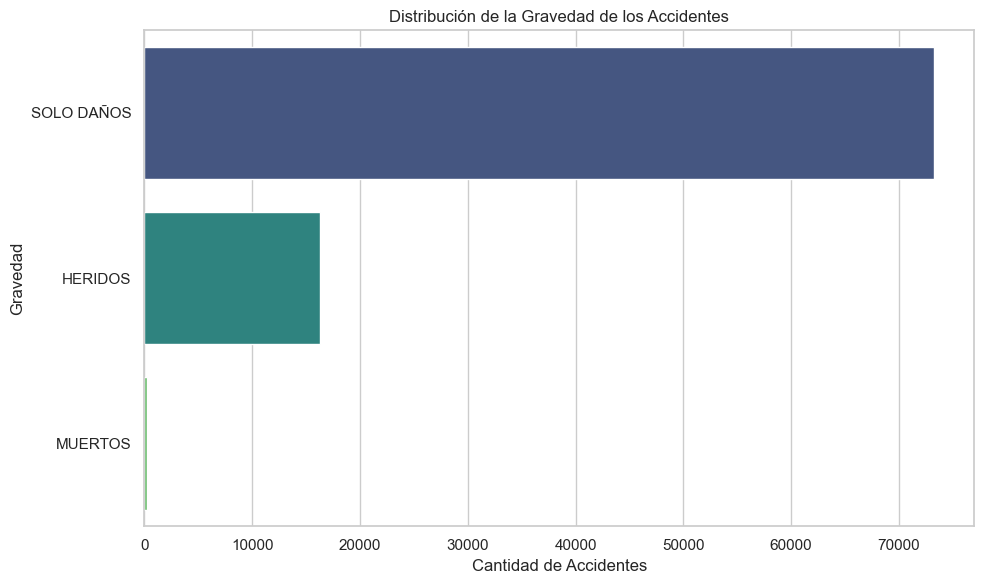

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(y='GRAVEDAD', data=df, palette='viridis')
plt.title('Distribución de la Gravedad de los Accidentes')
plt.ylabel('Gravedad')
plt.xlabel('Cantidad de Accidentes')
plt.tight_layout()
plt.show()

# Análisis de la clase de accidente

In [28]:
clase_accidente_counts = df['CLASE DE ACCIDENTE'].value_counts()
print("Distribución de la clase de accidentes:")
print(clase_accidente_counts)

Distribución de la clase de accidentes:
CLASE DE ACCIDENTE
CHOQUE            83701
ATROPELLO          2824
CAIDA OCUPANTE     2333
OTRO                532
VOLCAMIENTO         414
INCENDIO             20
NO REPORTADA          2
Name: count, dtype: int64


# Visualización de la clase de accidente

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\2788302189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CLASE DE ACCIDENTE', data=df, palette='viridis')


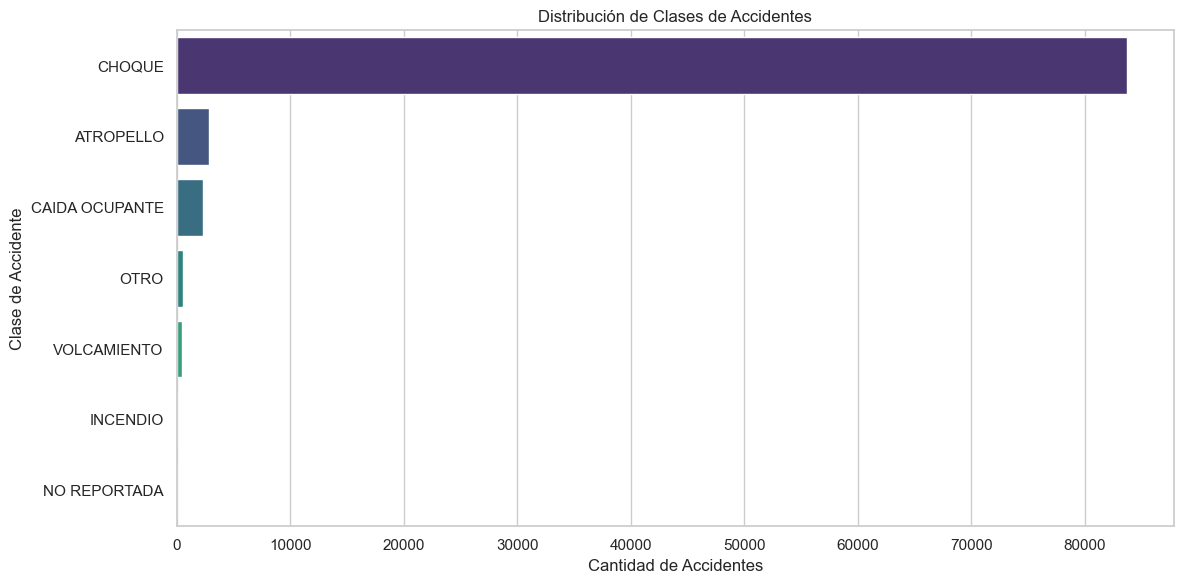

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y='CLASE DE ACCIDENTE', data=df, palette='viridis')
plt.title('Distribución de Clases de Accidentes')
plt.ylabel('Clase de Accidente')
plt.xlabel('Cantidad de Accidentes')
plt.tight_layout()
plt.show()

# Análisis de causas de accidentes

In [30]:
top_causas = df['CAUSA'].value_counts().head(10)
print("Top 10 causas de accidentes:")
print(top_causas)

Top 10 causas de accidentes:
CAUSA
Otra-Conductor                              21217
No mantener distancia de seguridad          20313
Desobedecer señales                         10187
Impericia en el manejo                       6881
Transitar entre vehiculos                    4946
No respetar prelacion                        3604
Adelantar cerrando                           2895
Reverso imprudente                           2063
Poner en marcha un vehiculo sin precauci     1573
Subirse al anden o vias Peatonales           1435
Name: count, dtype: int64


# Análisis de causas de accidentes

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\320291322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causas.values, y=top_causas.index, palette='coolwarm')


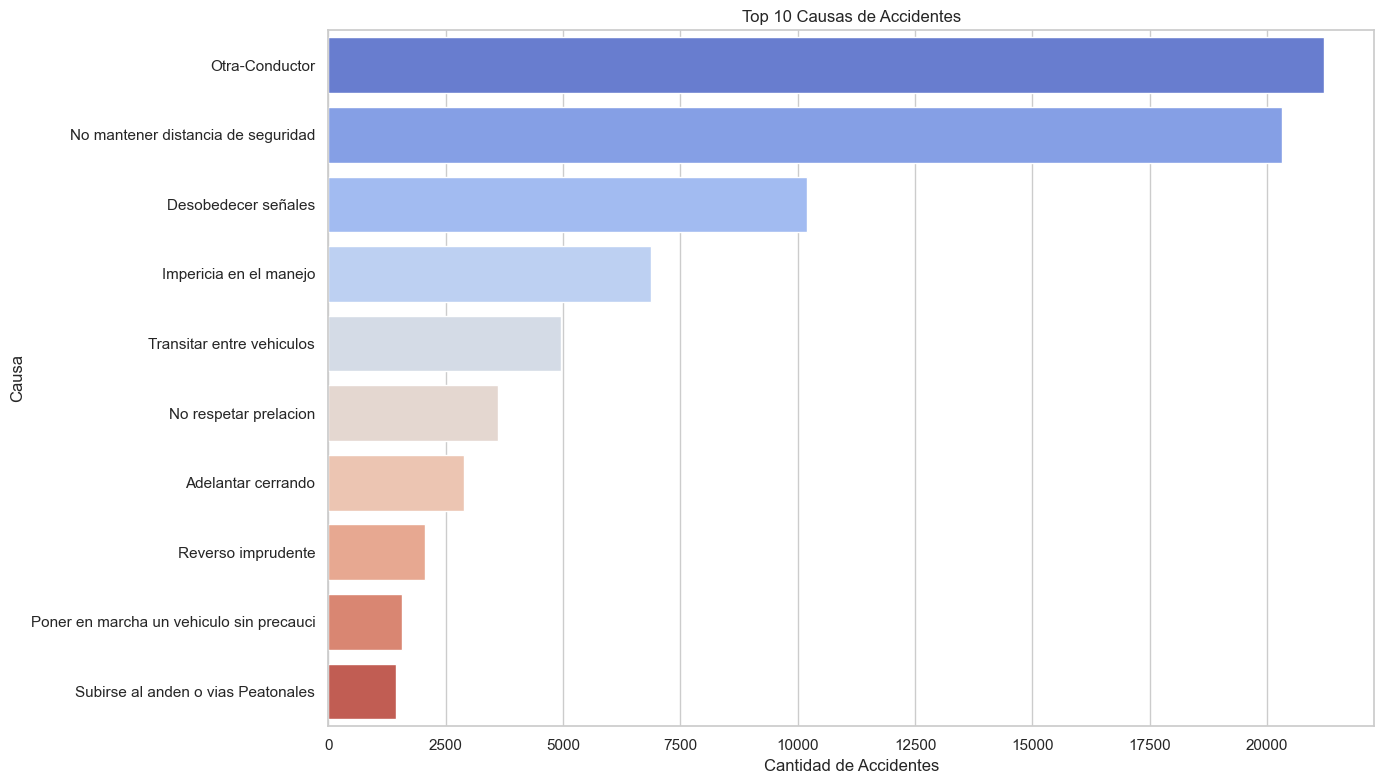

In [31]:

top_causas = df['CAUSA'].value_counts().head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_causas.values, y=top_causas.index, palette='coolwarm')
plt.title('Top 10 Causas de Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Causa')
plt.tight_layout()
plt.show()

# Análisis temporal: Distribución por día de la semana

In [32]:
dia_semana_counts = df['DÍA DE LA SEMANA'].value_counts().sort_index()
print("Distribución de accidentes por día de la semana:")
print(dia_semana_counts)

Distribución de accidentes por día de la semana:
DÍA DE LA SEMANA
Domingo       8295
Jueves       13507
Lunes        12605
Martes       13957
Miércoles    13598
Sábado       13402
Viernes      14462
Name: count, dtype: int64


# Análisis temporal: Distribución por día de la semana

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\2629610160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dia_semana_counts.index, y=dia_semana_counts.values, palette='viridis')


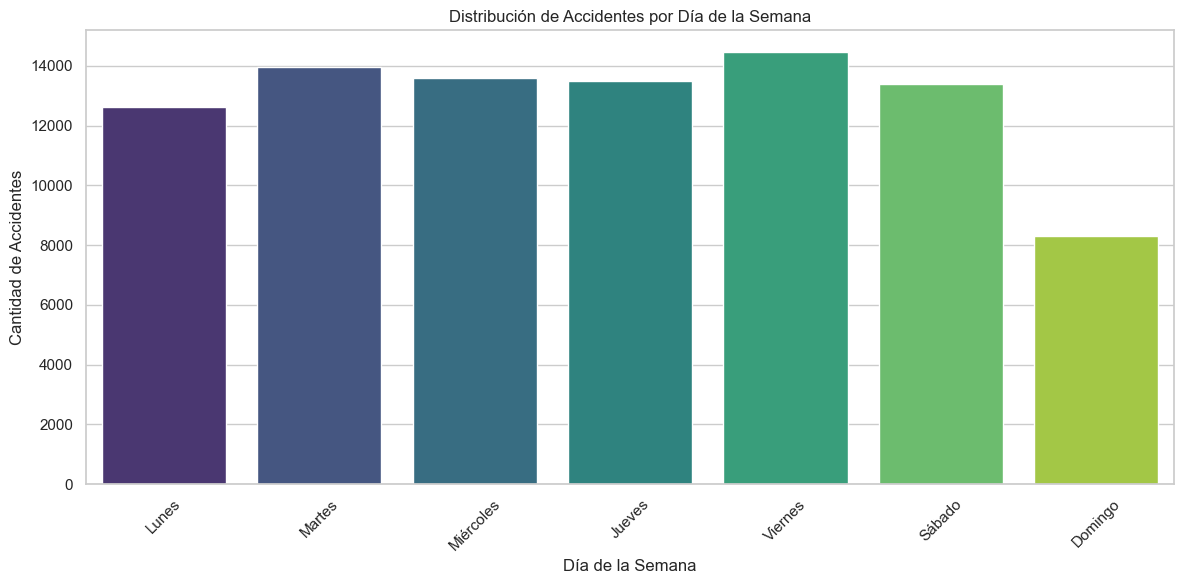

In [33]:
dia_semana_counts = df['DÍA DE LA SEMANA'].value_counts()
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
dias_presentes = [dia for dia in orden_dias if dia in dia_semana_counts.index]
dia_semana_counts = dia_semana_counts.reindex(dias_presentes)
plt.figure(figsize=(12, 6))
sns.barplot(x=dia_semana_counts.index, y=dia_semana_counts.values, palette='viridis')
plt.title('Distribución de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis temporal: Distribución por mes

In [34]:
mes_counts = df['MES'].value_counts().sort_index()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
mes_counts.index = [meses[i-1] for i in mes_counts.index]

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\414167938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mes_counts.index, y=mes_counts.values, palette='viridis')


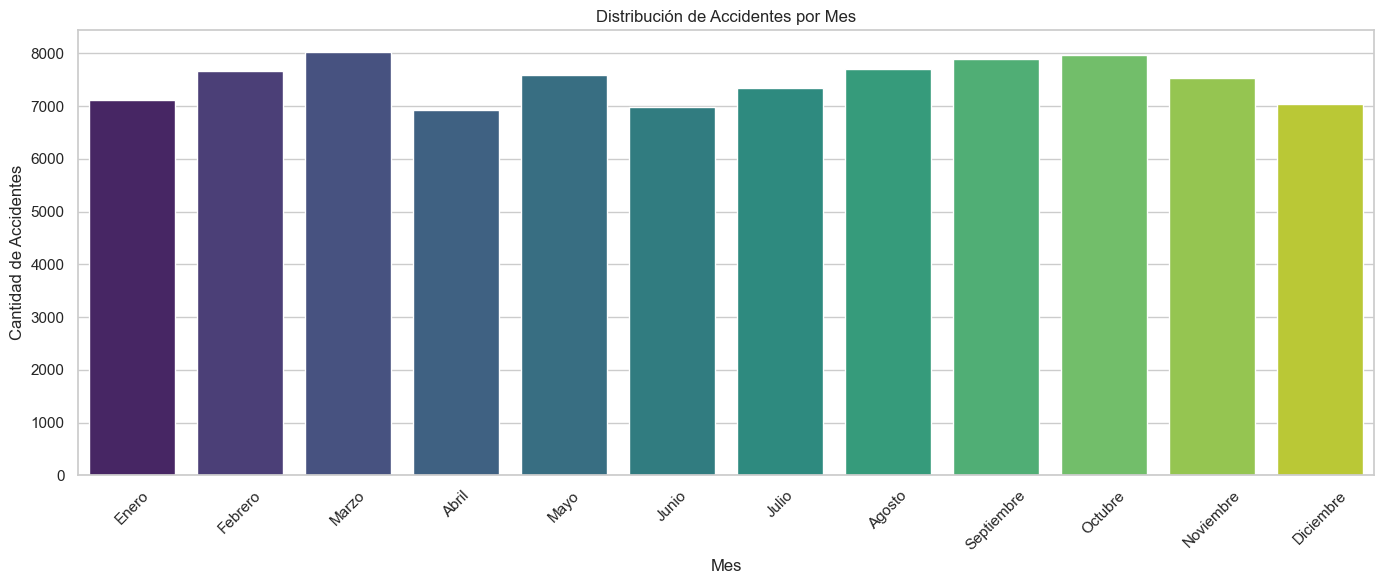

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(x=mes_counts.index, y=mes_counts.values, palette='viridis')
plt.title('Distribución de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis temporal: Distribución por franja horaria

In [38]:
franja_horaria_counts = df['FRANJA_HORARIA'].value_counts()
orden_franjas = ['Madrugada', 'Mañana', 'Tarde', 'Noche', 'Sin dato']
franja_horaria_counts = franja_horaria_counts.reindex(orden_franjas)

C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\1889827761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=franja_horaria_counts.index, y=franja_horaria_counts.values, palette='viridis')


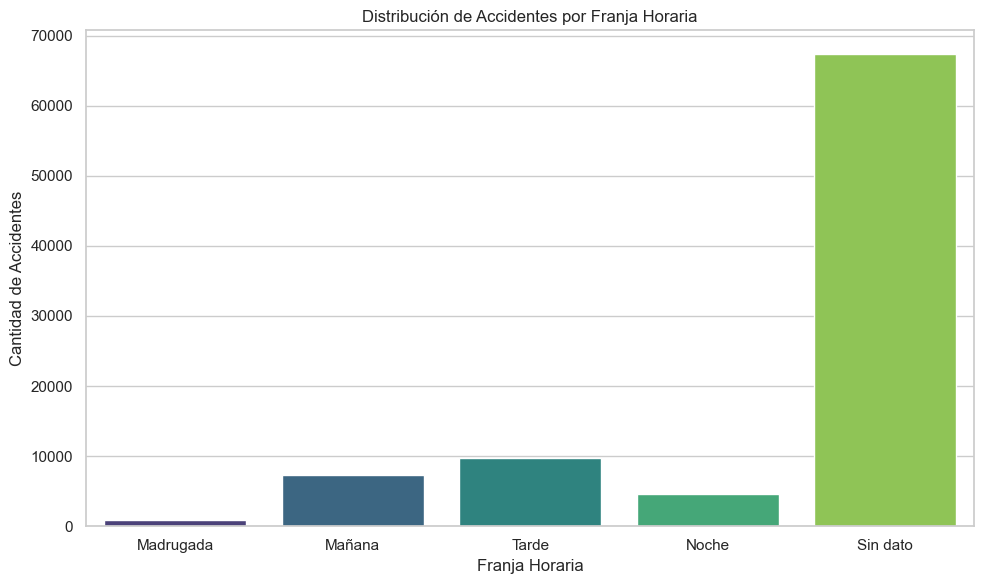

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=franja_horaria_counts.index, y=franja_horaria_counts.values, palette='viridis')
plt.title('Distribución de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Accidentes')
plt.tight_layout()
plt.show()

# Análisis por ubicación: Top 10 barrios con más accidentes

In [40]:
barrios_counts = df['BARRIO'].value_counts().head(10)
print("Top 10 barrios con más accidentes:")
print(barrios_counts)

Top 10 barrios con más accidentes:
BARRIO
LAS VEGAS             25993
ZONA CENTRO            9281
VEREDA PALMAS          6417
ZUÑIGA                 4195
MESA                   3883
VEREDA EL ESCOBERO     3221
ALCALA                 2956
LA MAGNOLIA            2826
EL DORADO              2246
SAN JOSE               1924
Name: count, dtype: int64


C:\Users\Diego\AppData\Local\Temp\ipykernel_19064\3365282159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barrios_counts.values, y=barrios_counts.index, palette='coolwarm')


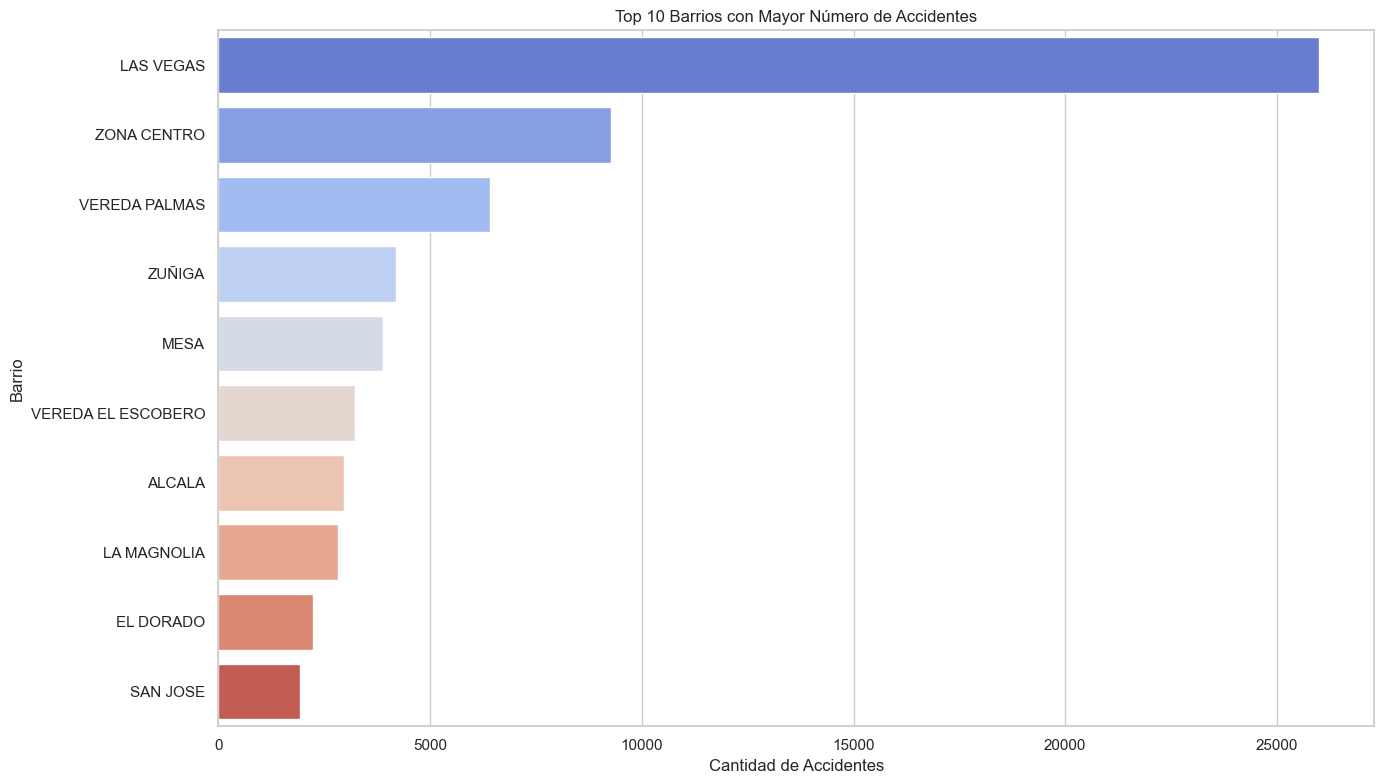

In [41]:
barrios_counts = df['BARRIO'].value_counts().head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=barrios_counts.values, y=barrios_counts.index, palette='coolwarm')
plt.title('Top 10 Barrios con Mayor Número de Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

# Clase de accidente vs Gravedad

In [42]:
cross_tab = pd.crosstab(df['CLASE DE ACCIDENTE'], df['GRAVEDAD'])
print("Tabla de contingencia - Clase de Accidente vs Gravedad:")
print(cross_tab)

Tabla de contingencia - Clase de Accidente vs Gravedad:
GRAVEDAD            HERIDOS  MUERTOS  SOLO DAÑOS
CLASE DE ACCIDENTE                              
ATROPELLO              2528       57         239
CAIDA OCUPANTE         2269       18          46
CHOQUE                10970      143       72588
INCENDIO                  0        0          20
NO REPORTADA              0        0           2
OTRO                    298        4         230
VOLCAMIENTO             242        2         170


<Figure size 1200x800 with 0 Axes>

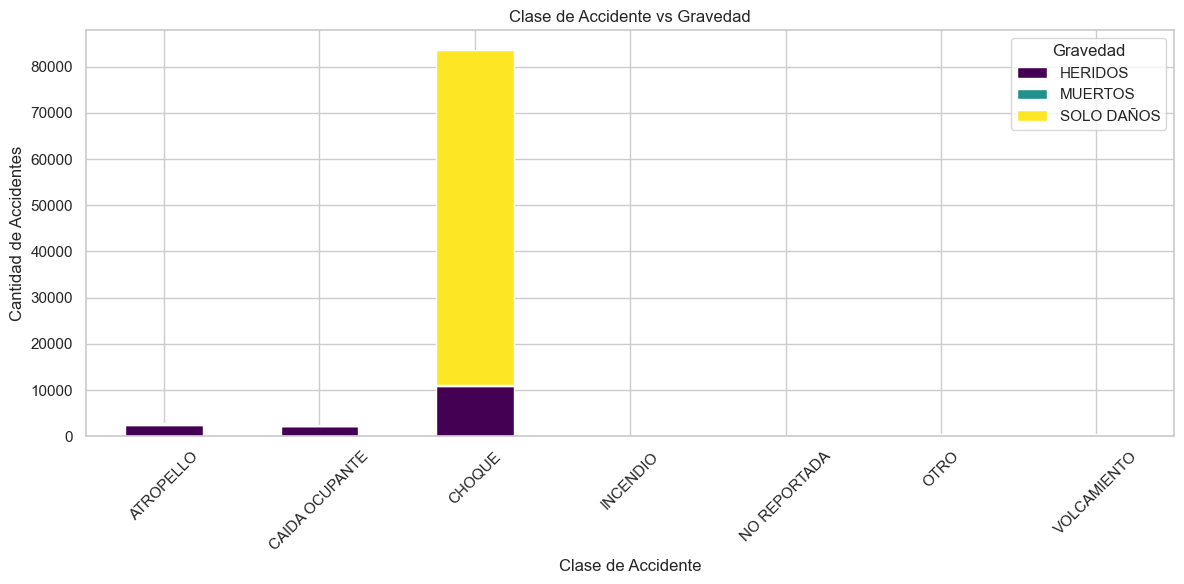

In [43]:
plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df['CLASE DE ACCIDENTE'], df['GRAVEDAD'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Clase de Accidente vs Gravedad')
plt.xlabel('Clase de Accidente')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='Gravedad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()